### Libraries

In [112]:
#general libraries for plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as matimage
import seaborn as sns
import pandas
import os
import re

#for splitting data
from sklearn.model_selection import train_test_split

#For image processing
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

# For downloading fashion mnist dataset
from keras.datasets import fashion_mnist

#For building model
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D,Dropout, BatchNormalization, LeakyReLU, Input
from keras.models   import Sequential, Model
from keras.optimizers import adam_v2
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img, img_to_array


#pretrained model
from keras.applications import vgg16

#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [113]:
import gc as garbagecollector

### Plotting 

In [114]:
def plotting(data, labels,reshape = False, size = (5,5),r_shape=(28,28)):
    """
        Description: This function plots images in the grid way
        Output: None
        
        data: Numpy.ndarray
        labels:list of labels corresponding to data points
        reshape: default is set to false, If True you can specify shape of image(r_shape)
        size: Default (5,5) images, Provide a tuple with desired size(Rows,Columns)
        r_shape:If reshape is set True, Specify shape of image
        
        Note: r_shape must match original image shape, if altered it throws error. \
        Best to use when data is flattened and you exactly knew the shape
    """
    index = 0
    fig, ax = plt.subplots(size[0],size[1],figsize=(10,10)) #getting desired plots
    #iterating over subplots
    for i in range(ax.shape[0]):
        for j in range(ax.shape[1]):
            if reshape == True:
                ax[i][j].imshow(data[index].reshape(r_shape))
            else:
                ax[i][j].imshow(data[index])
            ax[i][j].axis("off")
            ax[i][j].set_title(labels[index])
            index += 1

## Traditional Data Augmentation

### Demo of transformations on weather dataset

https://data.mendeley.com/datasets/4drtyfjtfy/1

Dataset is from above website

In [232]:
#Path for wheather dataset

weather_images_path = "..\\Datasets\\Weather"

In [233]:
# Dictionary denoting labels of weather prediction dataset
weather_labeldict = {"cloudy":0,'sunrise':1,"rain":2,"shine":3}

#Loading images and respective labels 
weatherimages = list()
weatherlabels = list()

for image_ in os.listdir(weather_images_path):
    img = load_img(weather_images_path+'/'+image_, target_size = (224,224))
    label = weather_labeldict[re.sub(r'[0-9]','',image_.split('.')[0])]
    weatherimages.append(img_to_array(img))
    weatherlabels.append(label)

# Converting both list into numpy arrays
weatherimages = np.array(weatherimages, dtype = np.float32)
weatherlabels = np.array(weatherlabels,dtype = np.float32)

In [222]:
weatherimages.shape, weatherlabels.shape

((1125, 224, 224, 3), (1125,))

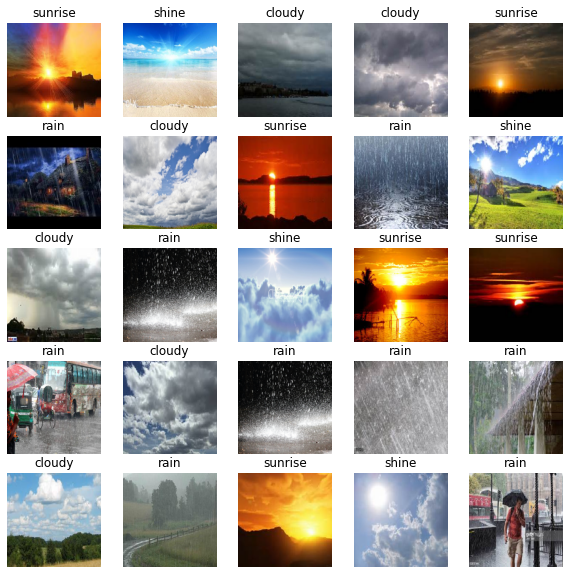

In [223]:
weather_labeldict_ = {0:"cloudy",1:'sunrise',2:"rain",3:"shine"}

randindex = np.random.randint(0,weatherimages.shape[0],36) # Generating 36 random numbers 

labels = [ weather_labeldict_[int(label)] for label in weatherlabels[randindex] ]

plotting(weatherimages[randindex].astype('uint32'), labels, reshape = True, r_shape=(224,224,3)) # plotting our random images

In [224]:
sample_image = weatherimages[320] #selecting random image

sample_image = np.expand_dims(sample_image, 0) # we are expanding dimensionality because ImageDataGenerator expects to have rank 4

sample_label = weatherlabels[0]

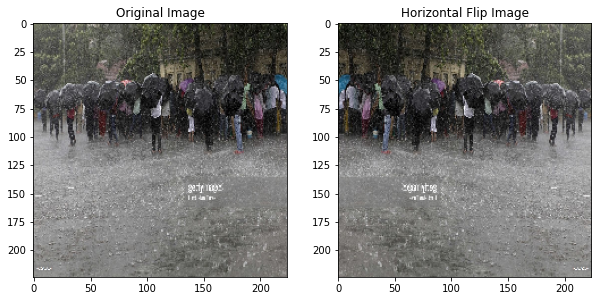

In [226]:
#Applying horizontal flip
trail = ImageDataGenerator(horizontal_flip = True)
sample_gen_image = trail.flow(sample_image, batch_size= 1 )
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10)) #generating subplots
for s_image in sample_gen_image:
    ax1.imshow((sample_image.reshape(224,224,3)).astype("uint8")) 
    ax1.set_title("Original Image")
    img = (s_image.reshape(224,224,3)).astype("uint8")
    ax2.set_title("Horizontal Flip Image")
    ax2.imshow(img)
    break

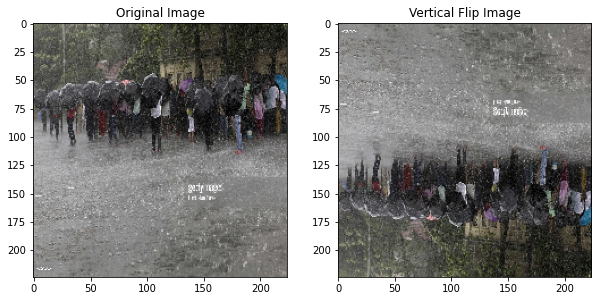

In [225]:
#Applying vertical flip
trail = ImageDataGenerator(vertical_flip = True)
sample_gen_image = trail.flow(sample_image, batch_size= 1 )
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
for s_image in sample_gen_image:
    ax1.imshow((sample_image.reshape(224,224,3)).astype("uint8"))
    ax1.set_title("Original Image")
    img = (s_image.reshape(224,224,3)).astype("uint8")
    ax2.set_title("Vertical Flip Image")
    ax2.imshow(img)
    break

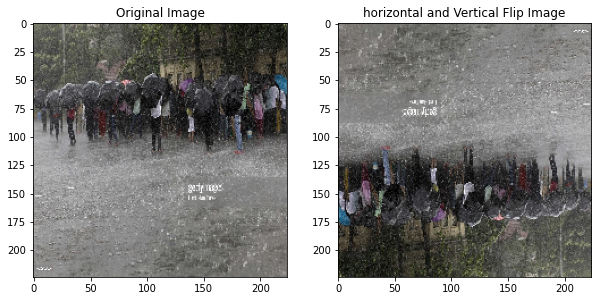

In [237]:
#Applying horizontal and vertical flip
trail = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
sample_gen_image = trail.flow(sample_image, batch_size= 1 )
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
for s_image in sample_gen_image:
    ax1.imshow((sample_image.reshape(224,224,3)).astype("uint8"))
    ax1.set_title("Original Image")
    img = (s_image.reshape(224,224,3)).astype("uint8")
    ax2.set_title("horizontal and Vertical Flip Image")
    ax2.imshow(img)
    break

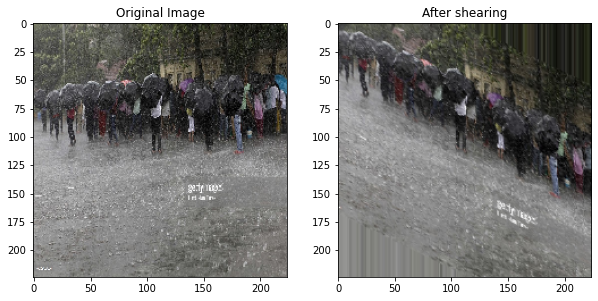

In [227]:
#Applying shearing transformation
trail = ImageDataGenerator(shear_range = 45)
sample_gen_image = trail.flow(sample_image, batch_size= 1 )
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
for s_image in sample_gen_image:
    ax1.imshow((sample_image.reshape(224,224,3)).astype("uint8"))
    ax1.set_title("Original Image")
    img = (s_image.reshape(224,224,3)).astype("uint8")
    ax2.set_title("After shearing")
    ax2.imshow(img)
    break

In [228]:
#Applying changing brightness transformation
trail = ImageDataGenerator(brightness_range =[0.4,0.8])
sample_gen_image = trail.flow(sample_image, batch_size= 1 )
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
for s_image in sample_gen_image:
    ax1.imshow((sample_image.reshape(224,224,3)).astype("uint8"))
    ax1.set_title("Original Image")
    img = (s_image.reshape(224,224,3)).astype("uint8")
    ax2.set_title("brightness changed")
    ax2.imshow(img)
    break

In [229]:
# Zooming our transformation
trail = ImageDataGenerator(zoom_range =[0.5,1])
sample_gen_image = trail.flow(sample_image, batch_size= 1 )
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
for s_image in sample_gen_image:
    ax1.imshow((sample_image.reshape(224,224,3)).astype("uint8"))
    ax1.set_title("Original Image")
    img = (s_image.reshape(224,224,3)).astype("uint8")
    ax2.set_title("zoom changed")
    ax2.imshow(img)
    break

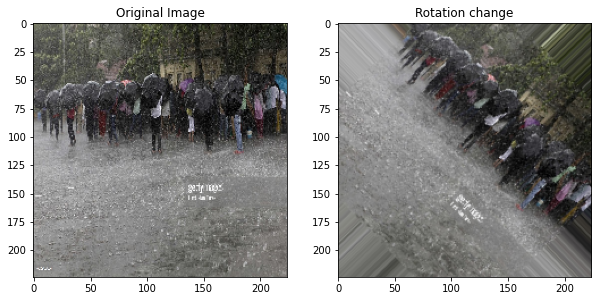

In [230]:
#Rotating our image
trail = ImageDataGenerator(rotation_range = 60)
sample_gen_image = trail.flow(sample_image, batch_size= 1 )
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
for s_image in sample_gen_image:
    ax1.imshow((sample_image.reshape(224,224,3)).astype("uint8"))
    ax1.set_title("Original Image")
    img = (s_image.reshape(224,224,3)).astype("uint8")
    ax2.set_title("Rotation change")
    ax2.imshow(img)
    break

In [240]:
#Applying width shift
trail = ImageDataGenerator(width_shift_range =0.5)
sample_gen_image = trail.flow(sample_image, batch_size= 1 )
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,10))
for s_image in sample_gen_image:
    ax1.imshow((sample_image.reshape(224,224,3)).astype("uint8"))
    ax1.set_title("Original Image")
    img = (s_image.reshape(224,224,3)).astype("uint8")
    ax2.set_title("Width shift transformation")
    ax2.imshow(img)
    break

#### Data Generator class for generating classical augmentated images

- We have seen transformation for single image above, now we build a DataGenerator that will helps us apply transformations for our data sets

In [115]:
class DataGenerator:
    
    def __init__(self,hflip = True,vflip = True,shift = True, shiftrange = 0.5, poison = True, gaussian = True,\
                 speckle = True, shear = 45, zca = True, bright = True):
        self.hflip = hflip #horizontal flip
        self.vflip = vflip # vertical flip
        self.shift = shift #shifting
        self.shiftrange = shiftrange #range of shift
        self.poison = poison #poison noise 
        self.gaussian = gaussian #gaussian noise
        self.speckle = speckle #speckle noise
        self.shear = shear # shear transformation
        self.zca_whiten = zca # ZCA whitening
        self.color_brightness = bright # colour brightness changes
        self.__fit() #Sets all required transformation
        
    
    def __poissonNoise(self,img):
        """
            Function  generates image with poisson noise
            img: image

            returns image with shape similar to original image
        """
        #generating poisson distribution
        poison = np.random.poisson(img)
        # adding it to our image
        noise = (img + poison).astype('uint8')
        return noise
    
    def __speckleNoise(self,img):
        """
            Function  generates image with speckle noise
            img: image

            returns image with shape similar to original image
        """
        # generating gaussian distribution 
        gaussian = np.random.normal(0,1,img.shape)
        gaussian = gaussian.reshape(img.shape) # modifying into shape of our image
        #adding it to our image
        noise = (img + img * gaussian).astype('uint8')
        return noise
        
    def __gaussianNoise(self,img):
        """
            Function  generates image with gaussian noise
            img: image

            returns image with shape similar to original image
        """
        gaussian = np.random.normal(0,1,img.shape) #generating normal distribution
        gaussian = gaussian.reshape(img.shape)
        noise = np.clip(img + gaussian,0,255).astype('uint8')
        return noise
    
    def __fit(self):
        """
         This method keeps track of all necessary transforms to be performed
        """
        self.transformations = list()
        #Geometric transformations
        if self.hflip == True:
            h_flip = ImageDataGenerator(horizontal_flip = True) #Flipping image over horitizal axis
            self.transformations.append(h_flip)
        if self.vflip == True:
            v_flip = ImageDataGenerator(vertical_flip = True) #Flipping image over vertical axis
            self.transformations.append(v_flip)
            
        if self.shift == True:
            w_s_range = ImageDataGenerator(width_shift_range = self.shiftrange) #Shifting image towards sides in specified range
            h_s_range = ImageDataGenerator(height_shift_range = self.shiftrange) #shifting image up or down in specified range
            self.transformations.append(w_s_range)
            self.transformations.append(h_s_range)
            
        zoom = ImageDataGenerator(zoom_range = [0.5,1]) #close up of image
        self.transformations.append(zoom)
        
        rotation = ImageDataGenerator(rotation_range = 60) #Rotating image basing on desired angle
        self.transformations.append(rotation)
        
        shear = ImageDataGenerator(shear_range = self.shear) # slanting image in specified angle
        self.transformations.append(shear)
        # Noise Transformations
        
        if self.poison == True:
            poison = ImageDataGenerator(preprocessing_function=self.__poissonNoise) #poisson noise
            self.transformations.append(poison)
        if self.gaussian == True:
            gaussian = ImageDataGenerator(preprocessing_function=self.__gaussianNoise) #gaussian noise
            self.transformations.append(gaussian)
        if self.speckle == True:
            speckle = ImageDataGenerator(preprocessing_function=self.__speckleNoise) #speckle noise
            self.transformations.append(speckle)
        
        # Color changes
        if self.zca_whiten == True:
            whitening = ImageDataGenerator(zca_whitening = True) # Applying zca_whitening 
            self.transformations.append(whitening)
        
        if self.color_brightness == True:
            brightness = ImageDataGenerator(brightness_range =[0.4,0.8]) #Brighten the image
            self.transformations.append(brightness)
        
        
        
    
    def transform(self,data,labels,batch_size = 10):
        """
            Generates augmented images with specific transformations that all fitted
            data: the data to be transformed
            labels: class labels
            batch_size: number of samples per transformation
            returns: Two numpy arrays representing transformed data and corresponding data
        """
        shape = data[0].shape
        generateddataset_x = [] # for storing generated image
        generateddataset_y = [] # for storing corresponding label of image
        for transformation in self.transformations:
            transformation.fit(data)
            it = transformation.flow(data,labels,batch_size = batch_size)
            for x_batch,y_batch in it:
                for i in range(batch_size):
                    img = (x_batch[i].reshape(shape)).astype("uint8")
                    generateddataset_x.append(img)
                    generateddataset_y.append(y_batch[i])
                break # As transformation. flow() returns gnerator, the loop continues indefinitely
        return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)
                    

## Fashion Mnist Dataset

- fashion mnist dataset was directly used from Keras data library

In [5]:
def fashionMNIST():
    (Xtrain,Ytrain),(testX,testY) = fashion_mnist.load_data() # Loading fashion mnist dataset
    Xtrain = Xtrain.reshape(Xtrain.shape[0],28,28,1) # reshaping into desired size
    #Converting both train and test into float type
    Xtrain = Xtrain.astype('float32')
    testX = testX.astype('float32')
    return (Xtrain,Ytrain),(testX,testY)

In [6]:
(fashionXtrain,fashionYtrain),(fashionXtest,fashionYtest) = fashionMNIST() # loading fashion mnist dataset

In [7]:
fashionlabeldict = {0:"T-shirt",1:"Trouser",2:"Pullover",3:"Dress",4:"Coat",5:"Sandal",6:"Shirt",7:"Sneaker",8:"Bag",9:"Ankle Boot"}

In [8]:
randindex = np.random.randint(0,fashionXtrain.shape[0],36)

labels = [ fashionlabeldict[int(label)] for label in fashionYtrain[randindex] ]

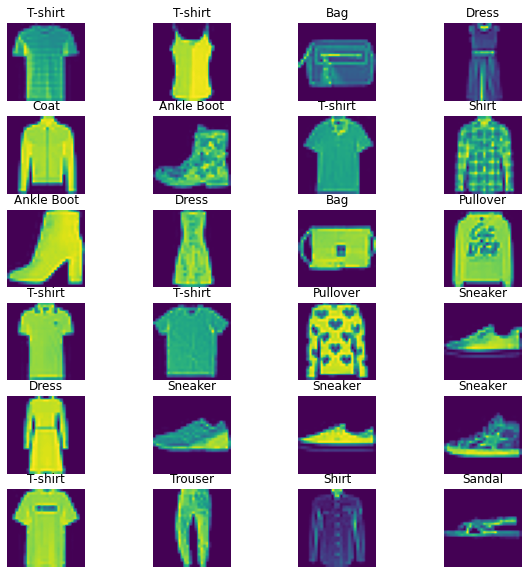

In [10]:
plotting(fashionXtrain[randindex], labels, reshape = True,size = (6,4))

In [11]:
dg = DataGenerator()

c:\users\bommi\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


In [12]:
dgdata_x,y = dg.transform(fashionXtrain,fashionYtrain)

C:\Users\bommi\AppData\Local\Temp\ipykernel_10428\1248123430.py:128: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


In [13]:
dgdata_x.shape, y.shape

((120, 28, 28, 1), (120,))

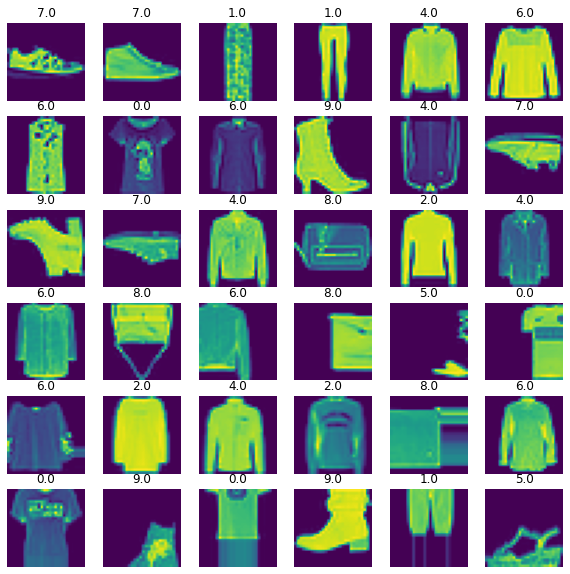

In [14]:
plotting(dgdata_x[0:36], y[0:36], reshape = True,size = (6,6))

#####  FashionMnist model building

In [37]:
def classificationModelMNIST():
    """
    Model for classifying fashion mnist dataset
    """
    
    mnist_model = Sequential()
    
    # first  convolutional layer 
    mnist_model.add(Conv2D(32,(3,3),activation = "relu",input_shape = (28,28,1))) 
    mnist_model.add(MaxPooling2D(2,2)) #Maxpooling layer
    mnist_model.add(Flatten())
    
    #Dense layer
    mnist_model.add(Dense(100,activation = "relu"))
    mnist_model.add(Dropout(0.5)) #dropping few neurons so as to keep it away from overfitting
    
    #final layer of our model, there are 10 class labels in our fashionmnist dataset
    mnist_model.add(Dense(10, activation = "softmax"))
    
    #Compiling our model
    mnist_model.compile(optimizer = adam_v2.Adam(0.0002),loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    return mnist_model

In [23]:
def trainingMNIST(data_x,data_y):
    """
    Training fashion mnist dataset
    """
    history_record = list()
    
    for data_quantity in [0.75,0.50,0.25,0.10]:
        # Name of the model for saving into local system
        model_name = "../Trained Models/fashion mnist/mnist_model_weights"+str(int(data_quantity * 100))+".h5"
        check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
        
        #for generating required amount of data for training
        xtrain,_,ytrain,_ = train_test_split(data_x,data_y,test_size = data_quantity,random_state = 42,stratify = data_y)
        
        #splitting train and test
        xtrain,x_test,ytrain,y_test = train_test_split(xtrain,ytrain,test_size = 0.25,random_state = 42,stratify = ytrain)

        augmentation_sample_size = xtrain.shape[0] // (2  * 11) 
        data_generator = DataGenerator(gaussian=False) 
        gen_datax,gen_datay = data_generator.transform(xtrain,ytrain,batch_size = augmentation_sample_size) #generating augmented images
       
        #Appending augmented data to our dataset
        X_augmented_data = np.append(xtrain,gen_datax, axis = 0)
        Y_augmented_data = np.append(ytrain,gen_datay, axis = 0)
        
        #normalizing the data
        X_augmented_data = X_augmented_data / 255.0
                
        #Converting class label
        ytrain = to_categorical(ytrain)
        y_test = to_categorical(y_test)
       
        #Training the model
        mnistmodel = classificationModelMNIST()
        model_history = mnistmodel.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])
        
        history_record.append(model_history)
                
        print(f" Amount of data considered:{data_quantity}, training completed")
        
    return history_record
               

In [24]:
history_record = trainingMNIST(fashionXtrain,fashionYtrain) # Calling trainingMNIST function for training on our data

c:\users\bommi\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\bommi\AppData\Local\Temp\ipykernel_6068\2367579523.py:131: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


Epoch 1/20
174/176 [============================>.] - ETA: 0s - loss: 3.3466 - accuracy: 0.3933
Epoch 1: val_accuracy improved from -inf to 0.65413, saving model to ./fashion mnist model\mnist_model_weights75.h5
176/176 [==============================] - 4s 22ms/step - loss: 3.3276 - accuracy: 0.3940 - val_loss: 1.0644 - val_accuracy: 0.6541
Epoch 2/20
174/176 [============================>.] - ETA: 0s - loss: 1.4131 - accuracy: 0.5288
Epoch 2: val_accuracy improved from 0.65413 to 0.67893, saving model to ./fashion mnist model\mnist_model_weights75.h5
176/176 [==============================] - 4s 20ms/step - loss: 1.4117 - accuracy: 0.5296 - val_loss: 1.0811 - val_accuracy: 0.6789
Epoch 3/20
175/176 [============================>.] - ETA: 0s - loss: 1.2205 - accuracy: 0.5704
Epoch 3: val_accuracy improved from 0.67893 to 0.70507, saving model to ./fashion mnist model\mnist_model_weights75.h5
176/176 [==============================] - 4s 21ms/step - loss: 1.2200 - accuracy: 0.5706 - va

c:\users\bommi\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\bommi\AppData\Local\Temp\ipykernel_6068\2367579523.py:131: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


Epoch 1/20
350/352 [============================>.] - ETA: 0s - loss: 2.2096 - accuracy: 0.5493
Epoch 1: val_accuracy improved from -inf to 0.73520, saving model to ./fashion mnist model\mnist_model_weights50.h5
352/352 [==============================] - 9s 25ms/step - loss: 2.2048 - accuracy: 0.5495 - val_loss: 0.7031 - val_accuracy: 0.7352
Epoch 2/20
351/352 [============================>.] - ETA: 0s - loss: 0.9631 - accuracy: 0.6540
Epoch 2: val_accuracy improved from 0.73520 to 0.77000, saving model to ./fashion mnist model\mnist_model_weights50.h5
352/352 [==============================] - 9s 25ms/step - loss: 0.9633 - accuracy: 0.6540 - val_loss: 0.6354 - val_accuracy: 0.7700
Epoch 3/20
350/352 [============================>.] - ETA: 0s - loss: 0.8515 - accuracy: 0.6896
Epoch 3: val_accuracy improved from 0.77000 to 0.77720, saving model to ./fashion mnist model\mnist_model_weights50.h5
352/352 [==============================] - 9s 25ms/step - loss: 0.8516 - accuracy: 0.6894 - va

c:\users\bommi\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\bommi\AppData\Local\Temp\ipykernel_6068\2367579523.py:131: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


Epoch 1/20
526/528 [============================>.] - ETA: 0s - loss: 1.8199 - accuracy: 0.5974
Epoch 1: val_accuracy improved from -inf to 0.79289, saving model to ./fashion mnist model\mnist_model_weights25.h5
528/528 [==============================] - 14s 25ms/step - loss: 1.8178 - accuracy: 0.5975 - val_loss: 0.6064 - val_accuracy: 0.7929
Epoch 2/20
527/528 [============================>.] - ETA: 0s - loss: 0.8209 - accuracy: 0.7201
Epoch 2: val_accuracy improved from 0.79289 to 0.83502, saving model to ./fashion mnist model\mnist_model_weights25.h5
528/528 [==============================] - 13s 24ms/step - loss: 0.8209 - accuracy: 0.7201 - val_loss: 0.4913 - val_accuracy: 0.8350
Epoch 3/20
526/528 [============================>.] - ETA: 0s - loss: 0.6969 - accuracy: 0.7447
Epoch 3: val_accuracy improved from 0.83502 to 0.84996, saving model to ./fashion mnist model\mnist_model_weights25.h5
528/528 [==============================] - 12s 24ms/step - loss: 0.6972 - accuracy: 0.7449 -

c:\users\bommi\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\bommi\AppData\Local\Temp\ipykernel_6068\2367579523.py:131: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


Epoch 1/20
631/633 [============================>.] - ETA: 0s - loss: 1.9756 - accuracy: 0.4519
Epoch 1: val_accuracy improved from -inf to 0.65104, saving model to ./fashion mnist model\mnist_model_weights10.h5
633/633 [==============================] - 17s 27ms/step - loss: 1.9734 - accuracy: 0.4520 - val_loss: 0.9008 - val_accuracy: 0.6510
Epoch 2/20
633/633 [==============================] - ETA: 0s - loss: 1.1397 - accuracy: 0.5794
Epoch 2: val_accuracy improved from 0.65104 to 0.77319, saving model to ./fashion mnist model\mnist_model_weights10.h5
633/633 [==============================] - 20s 31ms/step - loss: 1.1397 - accuracy: 0.5794 - val_loss: 0.6569 - val_accuracy: 0.7732
Epoch 3/20
633/633 [==============================] - ETA: 0s - loss: 0.9959 - accuracy: 0.6196
Epoch 3: val_accuracy improved from 0.77319 to 0.79874, saving model to ./fashion mnist model\mnist_model_weights10.h5
633/633 [==============================] - 17s 27ms/step - loss: 0.9959 - accuracy: 0.6196 -

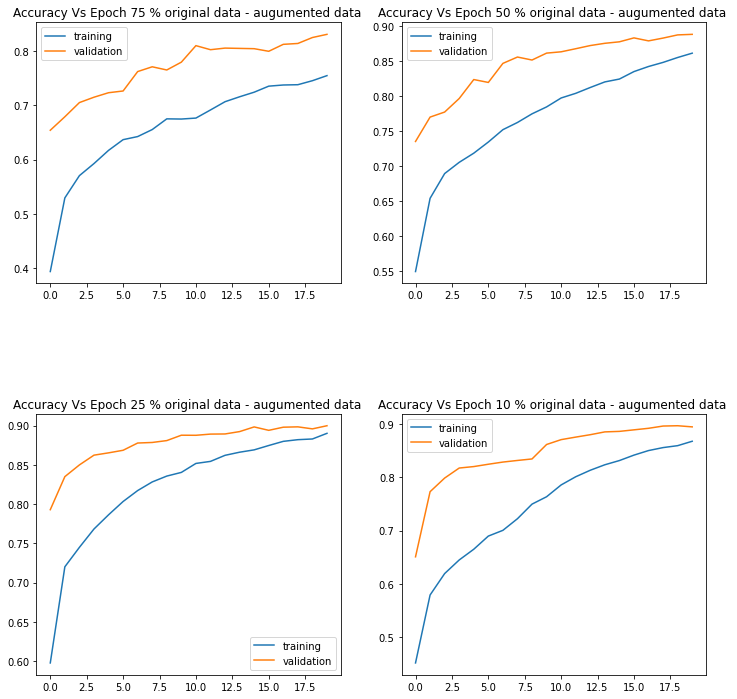

In [27]:
datasize = [0.75,0.50,0.25,0.10]
index = 0
fig, ax = plt.subplots(2,2,figsize = (12,12))
#Adjusting space between plots
fig.subplots_adjust(hspace = .5)
#iterating over subplots
for i in range(2):
    for j in range(2):
        #plotting accuracies 
        ax[i][j].plot(history_record[index].history['accuracy'])
        ax[i][j].plot(history_record[index].history['val_accuracy'])
        #Setting Graph Title
        ax[i][j].title.set_text("Accuracy Vs Epoch %s %% original data - augumented data "%str(int(datasize[index]*100)))
        ax[i][j].legend(['training','validation'])
        index += 1
plt.show()

In [34]:
def trainingMNISTWithoutAug(data_x,data_y):
    """
    Training fashion mnist dataset
    """
    history_record = list()
    
    for data_quantity in [0.75,0.50,0.25,0.10]:
        # Name of the model for saving into local system
        model_name = "../Trained Models/fashion mnist/MnistModelWeights_NoAug"+str(int(data_quantity * 100))+".h5"
        check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
        
        #normalizing the data
        data_x = data_x / 255.0
        
        #Splitting train and test
        xtrain,x_test,ytrain,y_test = train_test_split(data_x,data_y,test_size = 0.25,random_state = 42,stratify = data_y)
        
        #Converting class label
        ytrain = to_categorical(ytrain)
        y_test = to_categorical(y_test)
       
        #Training the model
        mnistmodel = classificationModelMNIST()
        model_history = mnistmodel.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])
        
        history_record.append(model_history)
        
        #mnistmodel.save_weights("./fashion mnist model/mnist_model_weights"+str(int(data_quantity * 100))+".h5")
        
        print(f" Amount of data considered:{data_quantity}, training completed")
        
    return history_record
               

In [35]:
history_record_noaug = trainingMNISTWithoutAug(fashionXtrain,fashionYtrain)

Epoch 1/20
702/704 [============================>.] - ETA: 0s - loss: 0.7728 - accuracy: 0.7382
Epoch 1: val_accuracy improved from -inf to 0.84147, saving model to ./fashion mnist model\MnistModelWeights_NoAug75.h5
704/704 [==============================] - 24s 32ms/step - loss: 0.7727 - accuracy: 0.7382 - val_loss: 0.4548 - val_accuracy: 0.8415
Epoch 2/20
703/704 [============================>.] - ETA: 0s - loss: 0.4913 - accuracy: 0.8292
Epoch 2: val_accuracy improved from 0.84147 to 0.86620, saving model to ./fashion mnist model\MnistModelWeights_NoAug75.h5
704/704 [==============================] - 23s 32ms/step - loss: 0.4912 - accuracy: 0.8292 - val_loss: 0.3787 - val_accuracy: 0.8662
Epoch 3/20
702/704 [============================>.] - ETA: 0s - loss: 0.4350 - accuracy: 0.8493
Epoch 3: val_accuracy improved from 0.86620 to 0.87800, saving model to ./fashion mnist model\MnistModelWeights_NoAug75.h5
704/704 [==============================] - 23s 32ms/step - loss: 0.4350 - accura

704/704 [==============================] - 23s 32ms/step - loss: 0.8917 - accuracy: 0.6746 - val_loss: 0.7397 - val_accuracy: 0.7399
Epoch 5/20
703/704 [============================>.] - ETA: 0s - loss: 0.8243 - accuracy: 0.6980
Epoch 5: val_accuracy improved from 0.73993 to 0.75040, saving model to ./fashion mnist model\MnistModelWeights_NoAug50.h5
704/704 [==============================] - 22s 32ms/step - loss: 0.8242 - accuracy: 0.6980 - val_loss: 0.6896 - val_accuracy: 0.7504
Epoch 6/20
704/704 [==============================] - ETA: 0s - loss: 0.7738 - accuracy: 0.7156
Epoch 6: val_accuracy improved from 0.75040 to 0.75553, saving model to ./fashion mnist model\MnistModelWeights_NoAug50.h5
704/704 [==============================] - 22s 31ms/step - loss: 0.7738 - accuracy: 0.7156 - val_loss: 0.6568 - val_accuracy: 0.7555
Epoch 7/20
703/704 [============================>.] - ETA: 0s - loss: 0.7374 - accuracy: 0.7266
Epoch 7: val_accuracy improved from 0.75553 to 0.76700, saving mode

704/704 [==============================] - 21s 30ms/step - loss: 2.3026 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 10/20
703/704 [============================>.] - ETA: 0s - loss: 2.3026 - accuracy: 0.0982
Epoch 10: val_accuracy did not improve from 0.10000
704/704 [==============================] - 21s 30ms/step - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 11/20
703/704 [============================>.] - ETA: 0s - loss: 2.3026 - accuracy: 0.0972
Epoch 11: val_accuracy did not improve from 0.10000
704/704 [==============================] - 20s 29ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 12/20
702/704 [============================>.] - ETA: 0s - loss: 2.3026 - accuracy: 0.0986
Epoch 12: val_accuracy did not improve from 0.10000
704/704 [==============================] - 21s 29ms/step - loss: 2.3026 - accuracy: 0.0986 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 13/20
703/704 [

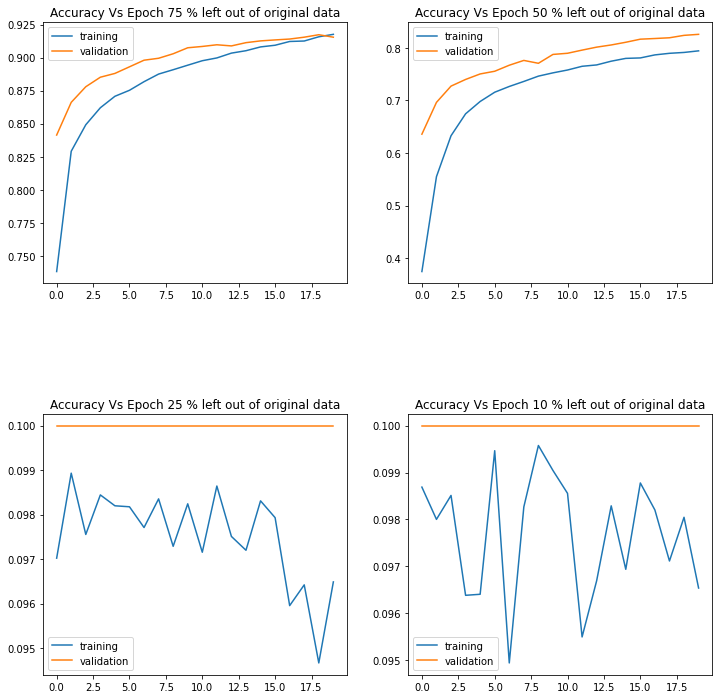

In [36]:
datasize = [0.75,0.50,0.25,0.10]
index = 0
fig, ax = plt.subplots(2,2,figsize = (12,12))
#Adjusting space between plots
fig.subplots_adjust(hspace = .5)
for i in range(2):
    for j in range(2):
        #plotting accuracies 
        ax[i][j].plot(history_record_noaug[index].history['accuracy'])
        ax[i][j].plot(history_record_noaug[index].history['val_accuracy'])
        #Setting Graph Title
        ax[i][j].title.set_text("Accuracy Vs Epoch %s %% left out of original data"%str(int(datasize[index]*100)))
        ax[i][j].legend(['training','validation'])
        index += 1
plt.show()

# Considering 50% of original data

###### Data from GAN

In [29]:
gan_model = keras.models.load_model("../Trained Model/GAN/CGAN_Generator50New.h5") #loading trained CGAN model

In [30]:
noise_images = np.random.randn(25000 *100).reshape(25000,100) #Creating sample noise 

In [31]:
labels = np.asarray([x for _ in range(2500) for x in range(10)]) #creating artifical labels

In [32]:
gan_images = gan_model.predict([noise_images,labels]) # generating images

In [38]:
model_name = "../Trained Models/fashion mnist/mnist_CGAN_model.h5"
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)

#for generating required amount of data for training
xtrain,_,ytrain,_ = train_test_split(fashionXtrain,fashionYtrain,test_size = 0.50,random_state = 42,stratify = fashionYtrain)

In [39]:
#Splitting train and test
xtrain,x_test,ytrain,y_test = train_test_split(xtrain,ytrain,test_size = 0.20,random_state = 42,stratify = ytrain)


In [40]:
#Appending augmented data to our dataset
xtrain = np.append(xtrain,gan_images, axis = 0)
ytrain = np.append(ytrain,labels, axis = 0)
        

In [41]:
#normalizing the data
xtrain = xtrain / 255.0
x_test = x_test/255.0


#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

#Training the model
mnistmodel = classificationModelMNIST()
model_history = mnistmodel.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])


Epoch 1/20
766/766 [==============================] - ETA: 0s - loss: 1.5460 - accuracy: 0.4923
Epoch 1: val_accuracy improved from -inf to 0.83417, saving model to ./fashion mnist model\mnist_CGAN_model.h5
766/766 [==============================] - 20s 25ms/step - loss: 1.5460 - accuracy: 0.4923 - val_loss: 0.5009 - val_accuracy: 0.8342
Epoch 2/20
765/766 [============================>.] - ETA: 0s - loss: 1.1815 - accuracy: 0.6482
Epoch 2: val_accuracy improved from 0.83417 to 0.84483, saving model to ./fashion mnist model\mnist_CGAN_model.h5
766/766 [==============================] - 19s 25ms/step - loss: 1.1814 - accuracy: 0.6482 - val_loss: 0.4419 - val_accuracy: 0.8448
Epoch 3/20
765/766 [============================>.] - ETA: 0s - loss: 0.9070 - accuracy: 0.6947
Epoch 3: val_accuracy improved from 0.84483 to 0.84817, saving model to ./fashion mnist model\mnist_CGAN_model.h5
766/766 [==============================] - 20s 26ms/step - loss: 0.9071 - accuracy: 0.6947 - val_loss: 0.42

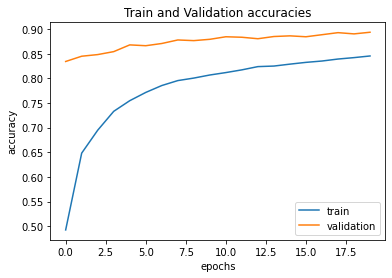

In [42]:
#plotting accuraries
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

##### Lets try data with both augmentation types

In [43]:
xtrain,_,ytrain,_ = train_test_split(fashionXtrain,fashionYtrain,test_size = 0.50,random_state = 42,stratify = fashionYtrain)

In [45]:
#Splitting train and test
xtrain,x_test,ytrain,y_test = train_test_split(xtrain,ytrain,test_size = 0.20,random_state = 42,stratify = ytrain)


In [46]:
noise_images = np.random.randn(12500 *100).reshape(12500,100) #Creating sample noise 
labels = np.asarray([x for _ in range(1250) for x in range(10)]) #creating artifical labels
gan_images = gan_model.predict([noise_images,labels]) # generating images

In [47]:
augmentation_sample_size = 568
data_generator = DataGenerator(gaussian=False) 
gen_datax,gen_datay = data_generator.transform(xtrain,ytrain,batch_size = augmentation_sample_size) #generating augmented images

c:\users\bommi\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\bommi\AppData\Local\Temp\ipykernel_21516\1443668982.py:131: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


In [48]:
model_name = "../Trained Models/fashion mnist/mnist_CGANandClassic_model.h5"
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)

#Appending augmented data to our dataset
xtrain = np.append(xtrain,gan_images, axis = 0)
ytrain = np.append(ytrain,labels, axis = 0)

In [49]:
#Appending augmented data to our dataset
xtrain = np.append(xtrain,gen_datax, axis = 0)
ytrain = np.append(ytrain,gen_datay, axis = 0)

In [50]:
#normalizing the data
xtrain = xtrain / 255.0
x_test = x_test/255.0


#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

#Training the model
mnistmodel = classificationModelMNIST()
model_history = mnistmodel.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])


Epoch 1/20
668/668 [==============================] - ETA: 0s - loss: 1.3814 - accuracy: 0.5166
Epoch 1: val_accuracy improved from -inf to 0.82150, saving model to ./fashion mnist model\mnist_CGANandClassic_model.h5
668/668 [==============================] - 19s 27ms/step - loss: 1.3814 - accuracy: 0.5166 - val_loss: 0.5389 - val_accuracy: 0.8215
Epoch 2/20
667/668 [============================>.] - ETA: 0s - loss: 1.1461 - accuracy: 0.6281
Epoch 2: val_accuracy improved from 0.82150 to 0.84133, saving model to ./fashion mnist model\mnist_CGANandClassic_model.h5
668/668 [==============================] - 17s 26ms/step - loss: 1.1458 - accuracy: 0.6282 - val_loss: 0.4594 - val_accuracy: 0.8413
Epoch 3/20
666/668 [============================>.] - ETA: 0s - loss: 1.0279 - accuracy: 0.6854
Epoch 3: val_accuracy improved from 0.84133 to 0.85867, saving model to ./fashion mnist model\mnist_CGANandClassic_model.h5
668/668 [==============================] - 18s 27ms/step - loss: 1.0283 - acc

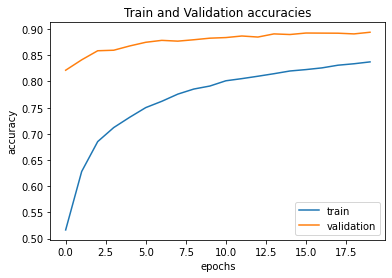

In [51]:
#plotting accuraries
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

###### testing of fashion mnist

In [20]:
# Custom model using data without augmentation
model = keras.models.load_model("../Trained Models/fashion mnist/MnistModelWeights_NoAug50.h5")
predict_y = model.predict(fashionXtest) #predicting for test set
predict_y = np.argmax(predict_y, axis = 1) # considering only label with max value

con_matrix = confusion_matrix(fashionYtest, predict_y)
print("Test score: % f" %(accuracy_score(fashionYtest,predict_y)))

plt.figure(figsize = (18,8))
conmatrix = pandas.crosstab(fashionYtest, predict_y) #Creating Confusion Matrix
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.644800


Test score:  0.885600


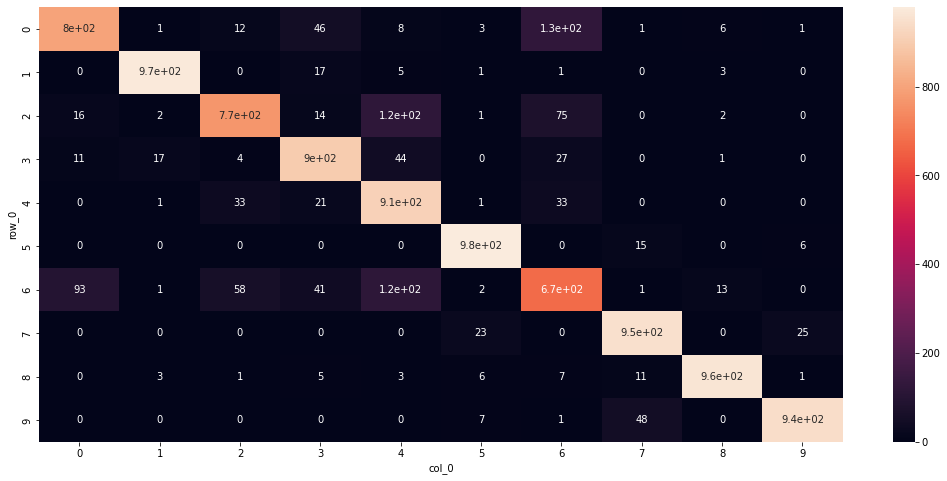

In [52]:
# Custom model which trained both on gan and tradition aug

model = keras.models.load_model("../Trained Models/fashion mnist/mnist_CGANandClassic_model.h5")
predict_y = model.predict(fashionXtest)
predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(fashionYtest, predict_y) # creating confusion matrix
print("Test score: % f" %(accuracy_score(fashionYtest,predict_y)))

#Plotting our confusion matrix
plt.figure(figsize = (18,8))
conmatrix = pandas.crosstab(fashionYtest, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.880700


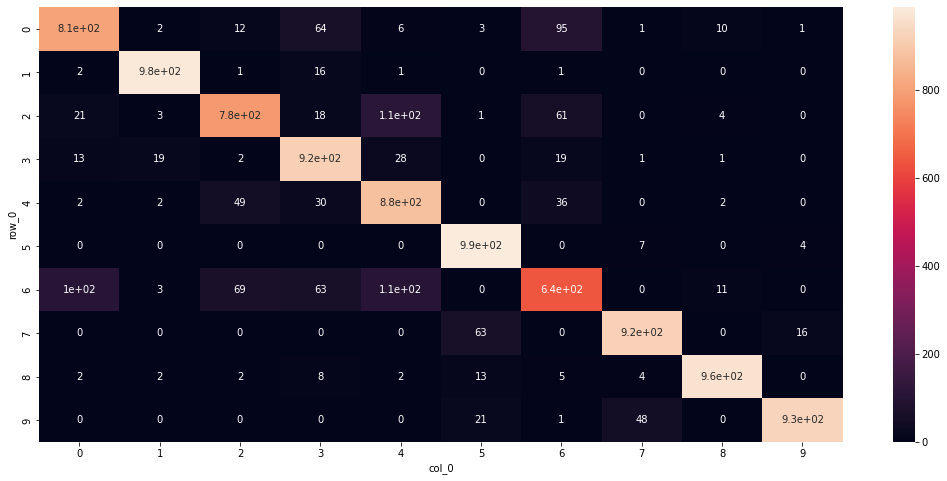

In [53]:
# Custom model using gan augmentated data
model = keras.models.load_model("../Trained Models/fashion mnist/mnist_CGAN_model.h5")
predict_y = model.predict(fashionXtest)
predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(fashionYtest, predict_y)
print("Test score: % f" %(accuracy_score(fashionYtest,predict_y)))

plt.figure(figsize = (18,8))
conmatrix = pandas.crosstab(fashionYtest, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

In [28]:
# Custom model using traditional augmentated data
model = keras.models.load_model("../Trained Models/fashion mnist/mnist_model_weights50.h5")
predict_y = model.predict(fashionXtest)
predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(fashionYtest, predict_y)
print("Test score: % f" %(accuracy_score(fashionYtest,predict_y)))

plt.figure(figsize = (18,8))
conmatrix = pandas.crosstab(fashionYtest, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.881600


#  Wheather Dataset

###### Splitting into test and train datasets

In [34]:
# Splitting our data in such a way that we reserve 10% of original set for testing purpose
weatherimages,weathertestx,weatherlabels,weathertesty = train_test_split(weatherimages,weatherlabels,test_size = 0.10,random_state = 42,stratify = weatherlabels)


#### Customised Model 

In [35]:
def weatherClassificationModel():
    """
        Custom model for classifying weather datatset
        returns: model
    """
    
    weathermodel = Sequential()
    
    #set of First layer
    weathermodel.add(Conv2D(32,(3,3),activation = "relu", input_shape = (224,224,3)))
    weathermodel.add(MaxPooling2D(3,3)) # performing max pooling operation on the output from above convlution
    weathermodel.add(BatchNormalization()) # performing batch normalization
    
    #set of Second layer
    weathermodel.add(Conv2D(16,(3,3),activation = "relu"))
    weathermodel.add(MaxPooling2D(3,3))
    weathermodel.add(BatchNormalization())
    
    weathermodel.add(Flatten()) # flattening output from above into single vector
    weathermodel.add(Dropout(0.5)) #dropping 50% neurons
    
    #first dense layer
    weathermodel.add(Dense(64,activation = "relu"))
    
    # Final layer, as our dataset consists of four class labels
    weathermodel.add(Dense(4,activation = "softmax"))
    
    #optimizer
    adam = adam_v2.Adam(0.002)
    #Compiling model
    weathermodel.compile(optimizer = adam,loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    return weathermodel

##### Classification on augmented data  basing on Customized model

In [36]:
# This spliting is for validation set
xtrain,x_test,ytrain,y_test = train_test_split(weatherimages,weatherlabels,test_size = 0.20,random_state = 42,stratify = weatherlabels)

In [37]:
# Initializing DataGenerator class
datagene = DataGenerator(vflip = False,zca = False)
# calculating number number images per transformation needed (overall size will be increased by half)
batchsize = weatherimages.shape[0]/ (2 * len(datagene.transformations))
# generating augmented data
datagenerated, ydatagen = datagene.transform(xtrain,ytrain,batch_size = int(batchsize)) 

C:\Users\bommi\AppData\Local\Temp\ipykernel_6068\2367579523.py:131: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


In [38]:
datagenerated.shape, ydatagen.shape

((500, 224, 224, 3), (500,))

In [39]:
weather_aug_data = np.append(xtrain,datagenerated,axis = 0)
weather_aug_label =  np.append(ytrain,ydatagen,axis = 0)

In [40]:
weather_aug_data.shape, weather_aug_label.shape

((1309, 224, 224, 3), (1309,))

In [41]:
#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

In [42]:
weathermodel = weatherClassificationModel()
model_name = "../Trained Models/weather/WeatherCustomModelwithAug.h5"
#creating checkpoint for saving best model
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
#Training the model
model_history = weathermodel.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 1.6790 - accuracy: 0.7058
Epoch 1: val_accuracy improved from -inf to 0.36453, saving model to WeatherCustomModelwithAug.h5
13/13 [==============================] - 25s 2s/step - loss: 1.6790 - accuracy: 0.7058 - val_loss: 47.1331 - val_accuracy: 0.3645
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 0.3505 - accuracy: 0.9036
Epoch 2: val_accuracy improved from 0.36453 to 0.59606, saving model to WeatherCustomModelwithAug.h5
13/13 [==============================] - 23s 2s/step - loss: 0.3505 - accuracy: 0.9036 - val_loss: 9.4154 - val_accuracy: 0.5961
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 0.2196 - accuracy: 0.9468
Epoch 3: val_accuracy did not improve from 0.59606
13/13 [==============================] - 26s 2s/step - loss: 0.2196 - accuracy: 0.9468 - val_loss: 9.8497 - val_accuracy: 0.5862
Epoch 4/20
13/13 [==============================] - ETA: 0s - loss: 0.0783 - acc

In [43]:
#plotting accuraries
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

##### Classification on without  augmented data  basing on Customized model

In [31]:
# Train and validation splits
xtrain,x_test,ytrain,y_test = train_test_split(weatherimages,weatherlabels,test_size = 0.20,random_state = 42,stratify = weatherlabels)

#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

In [1]:
import os

In [7]:
os.listdir("../Trained Models/weather/")

['WeatherCustomModelwithAug.h5',
 'WeatherCustomModelwithoutAug.h5',
 'weatherVGGmodelwithAUG.h5',
 'weatherVGGmodelwithoutaug.h5']

In [32]:
weathermodel = weatherClassificationModel()
model_name = "../Trained Models/weather/WeatherCustomModelwithoutAug.h5" # saving our model with this name for future use
#saving best model
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
#Training the model
model_history = weathermodel.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test),callbacks =[check_point])

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 1.3704 - accuracy: 0.7553
Epoch 1: val_accuracy improved from -inf to 0.49754, saving model to WeatherCustomModelwithoutAug.h5
13/13 [==============================] - 16s 1s/step - loss: 1.3704 - accuracy: 0.7553 - val_loss: 44.6076 - val_accuracy: 0.4975
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 0.6034 - accuracy: 0.8986
Epoch 2: val_accuracy improved from 0.49754 to 0.50739, saving model to WeatherCustomModelwithoutAug.h5
13/13 [==============================] - 15s 1s/step - loss: 0.6034 - accuracy: 0.8986 - val_loss: 44.7462 - val_accuracy: 0.5074
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 0.2267 - accuracy: 0.9271
Epoch 3: val_accuracy improved from 0.50739 to 0.52217, saving model to WeatherCustomModelwithoutAug.h5
13/13 [==============================] - 15s 1s/step - loss: 0.2267 - accuracy: 0.9271 - val_loss: 23.4390 - val_accuracy: 0.5222
Epoch 4/20
13/13 [=

In [33]:
#plotting accuraries
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

#### Pretrained model  vgg

In [52]:
def weather_VGGmodel():
    """
        pretrained model for classifying weather dataset
        
        returns: Model
    """
    
    #adapting vgg16 network for our network
    vgg_model = vgg16.VGG16(weights ="imagenet", input_shape = (224,224,3), include_top = False)
    #freezing vgg model
    vgg_model.trainable = False
    #Creating our custom model on top of vgg
    input_layer = Input(shape= (224,224,3))
    vgg_layer = vgg_model(input_layer, training = False)
    flatten_layer = Flatten()(vgg_layer)
    #Our dataset consists of 4class labels
    dense_layer1 = Dense(32,activation = "relu")(flatten_layer)
    drop_layer2 = Dropout(0.4)(dense_layer1) # dropping neurons in order to erase overfitting
    dense_layer = Dense(4, activation = "softmax")(drop_layer2)
    weather_vgg = Model(input_layer, dense_layer) #define the model
    weather_vgg.compile(optimizer = adam_v2.Adam(0.0002),loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    return weather_vgg

##### Classification on without augmented data  basing on pretrained model

In [55]:
weather_vgg = weather_VGGmodel()
weather_vgg.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 25088)             0         
                                                                 
 dense_16 (Dense)            (None, 32)                802848    
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 4)                 132       
                                                                 
Total params: 15,517,668
Trainable params: 802,980
Non-trai

In [56]:
xtrain,x_test,ytrain,y_test = train_test_split(weatherimages,weatherlabels,test_size = 0.20,random_state = 42,stratify = weatherlabels)

#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

In [57]:
model_name = "../Trained Models/weather/WeatherVggModelwithoutAug.h5"
#creating checkpoint for saving best model
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
model_history = weather_vgg.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])

Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 2.9513 - accuracy: 0.5501 
Epoch 1: val_accuracy improved from -inf to 0.78818, saving model to WeatherVggModelwithoutAug.h5
13/13 [==============================] - 241s 19s/step - loss: 2.9513 - accuracy: 0.5501 - val_loss: 0.7261 - val_accuracy: 0.7882
Epoch 2/20
13/13 [==============================] - ETA: 0s - loss: 0.5339 - accuracy: 0.7948 
Epoch 2: val_accuracy improved from 0.78818 to 0.82759, saving model to WeatherVggModelwithoutAug.h5
13/13 [==============================] - 247s 19s/step - loss: 0.5339 - accuracy: 0.7948 - val_loss: 0.5454 - val_accuracy: 0.8276
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 0.3763 - accuracy: 0.8529 
Epoch 3: val_accuracy improved from 0.82759 to 0.84729, saving model to WeatherVggModelwithoutAug.h5
13/13 [==============================] - 237s 19s/step - loss: 0.3763 - accuracy: 0.8529 - val_loss: 0.5152 - val_accuracy: 0.8473
Epoch 4/20
13/13 [====

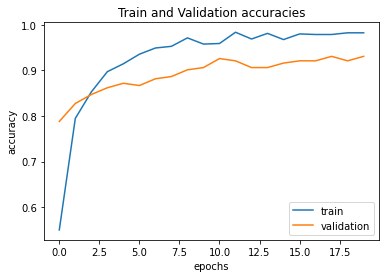

In [60]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

##### Classification on augmented data  basing on pretrained model

In [62]:
del xtrain
del x_test
del ytrain
del y_test
garbagecollector.collect()

10879

In [63]:
xtrain,x_test,ytrain,y_test = train_test_split(weather_aug_data,weather_aug_label,test_size = 0.20,random_state = 42,stratify = weather_aug_label)

#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

In [64]:
weather_vgg = weather_VGGmodel()

In [65]:
model_name = "../Trained Models/weather/WeatherVggModelwithAug.h5"
#creating checkpoint for saving best model
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
model_history = weather_vgg.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])

Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 3.2204 - accuracy: 0.5211 
Epoch 1: val_accuracy improved from -inf to 0.70297, saving model to WeatherVggModelwithAug.h5
19/19 [==============================] - 434s 23s/step - loss: 3.2204 - accuracy: 0.5211 - val_loss: 0.6996 - val_accuracy: 0.7030
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 0.7117 - accuracy: 0.6882 
Epoch 2: val_accuracy improved from 0.70297 to 0.79538, saving model to WeatherVggModelwithAug.h5
19/19 [==============================] - 445s 24s/step - loss: 0.7117 - accuracy: 0.6882 - val_loss: 0.5152 - val_accuracy: 0.7954
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 0.5012 - accuracy: 0.8040 
Epoch 3: val_accuracy improved from 0.79538 to 0.84488, saving model to WeatherVggModelwithAug.h5
19/19 [==============================] - 362s 19s/step - loss: 0.5012 - accuracy: 0.8040 - val_loss: 0.4538 - val_accuracy: 0.8449
Epoch 4/20
19/19 [=============

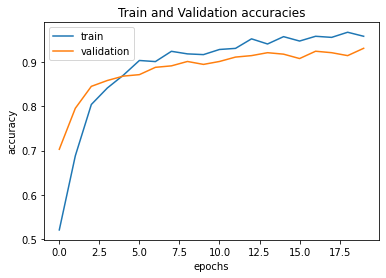

In [66]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

In [67]:
np.save("VGGmodel_history_weatherwithAUG.npy",model_history.history)

#### results on Weather Dataset

In [45]:
# Custom model without augmented data
model =keras.models.load_model("../Trained Models/weather/WeatherCustomModelwithoutAug.h5")
predict_y = model.predict(weathertestx)

predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(weathertesty, predict_y)
print("Test score: % f" %(accuracy_score(weathertesty,predict_y)))
conmatrix = pandas.crosstab(weathertesty, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.920354


In [46]:
# Custom model with augmented data
model = keras.models.load_model("../Trained Models/weather/WeatherCustomModelwithAug.h5")
predict_y = model.predict(weathertestx)

predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(weathertesty, predict_y)
print("Test score: % f" %(accuracy_score(weathertesty,predict_y)))

conmatrix = pandas.crosstab(weathertesty, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.929204


In [49]:
# VGG without augmented data
model = keras.models.load_model("../Trained Models/weather/WeatherVggModelwithoutAug.h5")
predict_y = model.predict(weathertestx)

predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(weathertesty, predict_y)
print("Test score: % f" %(accuracy_score(weathertesty,predict_y)))


conmatrix = pandas.crosstab(weathertesty, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.938053


In [50]:
# VGG with augmented data
model = keras.models.load_model("../Trained Models/weather/WeatherVggModelwithAug.h5")
predict_y = model.predict(weathertestx)

predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(weathertesty, predict_y)
print("Test score: % f" %(accuracy_score(weathertesty,predict_y)))


conmatrix = pandas.crosstab(weathertesty, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.938053


### CGIAR Dataset

source : <a href= "https://zindi.africa/competitions/iclr-workshop-challenge-1-cgiar-computer-vision-for-crop-disease">link</a> <br>
Please download data (Train set) from above web site and unzip into Datasets folder <br>
Note: To download dataset you need to have an account with Zindi platform


In [42]:
os.listdir("..\\Datasets/CGIAR/train")

['healthy_wheat', 'leaf_rust', 'stem_rust']

In [43]:
# path for CGIAR dataset
cgiar_dir_path = "..\\Datasets/CGIAR/train"

In [44]:
cgiar_dict = {'healthy_wheat':0, 'leaf_rust':1, 'stem_rust':2}

In [45]:
cgiarimages = list() # for images list
cgiarlabels = list() # for labels list

for dir_ in os.listdir(cgiar_dir_path):
    #looping over every folder
    for image in os.listdir(cgiar_dir_path+"/"+dir_):
        image_path = cgiar_dir_path+"/"+dir_ + "/"+image
        img = load_img(image_path, target_size = (224,224))
        cgiarimages.append(img_to_array(img))
        cgiarlabels.append(cgiar_dict[dir_])

In [46]:
cgiarimages = np.array(cgiarimages, dtype = np.float32)
cgiarlabels = np.array(cgiarlabels,dtype = np.float32)

In [47]:
cgiarimages.shape, cgiarlabels.shape

((876, 224, 224, 3), (876,))

In [48]:
cgiar_dict_ = {0:'healthy_wheat', 1:'leaf_rust', 2:'stem_rust'}

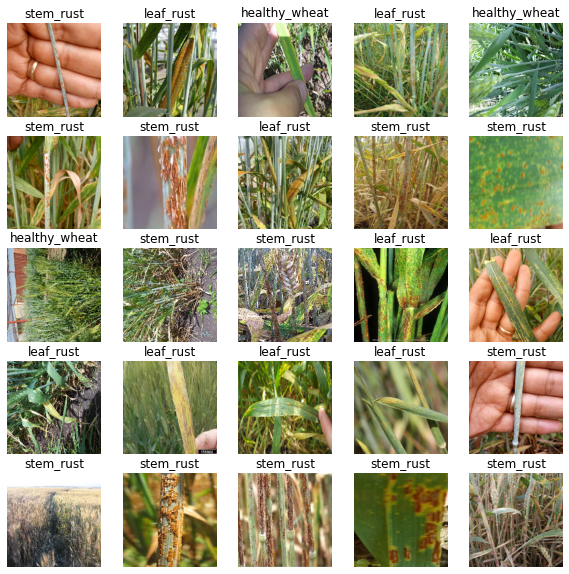

In [49]:
randindex = np.random.randint(0,cgiarimages.shape[0],36) # generating 36 random numbers
labels = [ cgiar_dict_[int(label)] for label in cgiarlabels[randindex] ] 
plotting(cgiarimages[randindex].astype('uint32'), labels, reshape = True, r_shape=(224,224,3)) #plotting our images 

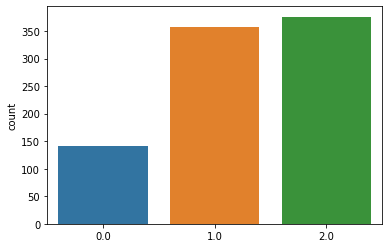

In [50]:
# Plotting our labels 
sns.countplot( x = cgiarlabels)
plt.show()

##### Train and Test Split

- We are reserving 10% of our data for testing purpose. Only going to utilize 90% for training and validation

In [51]:
cgiarimages,cgiartestx,cgiarlabels,cgiartesty = train_test_split(cgiarimages,cgiarlabels,test_size = 0.10,random_state = 42,stratify = cgiarlabels)

##### Customized model

In [52]:
def cgiarModel():
    
    cgiar_model =  Sequential()
    
    #First set of layers
    cgiar_model.add(Conv2D(128,(3,3),activation = "relu",input_shape=(224,224,3)))
    cgiar_model.add(MaxPooling2D((3,3)))
    
    #Second set of layers
    cgiar_model.add(Conv2D(128,(3,3),activation = "relu"))
    cgiar_model.add(Conv2D(64,(3,3),activation = "relu"))
    cgiar_model.add(MaxPooling2D((3,3)))
    
    #Third set layers
    cgiar_model.add(Conv2D(64,(3,3), activation = "relu"))
    cgiar_model.add((MaxPooling2D((3,3))))
    cgiar_model.add(Flatten())
    
    #Final set layers
    cgiar_model.add(Dropout(0.5))
    cgiar_model.add(Dense(32, activation = "relu"))
    cgiar_model.add(Dense(3, activation = "softmax"))
    
    #compiling model
    optimizer = adam_v2.Adam(0.0002)
    cgiar_model.compile(loss = "categorical_crossentropy",optimizer = optimizer,metrics=['accuracy'])
    
    return cgiar_model
    

In [53]:
cgiar_model  = cgiarModel()

In [54]:
cgiar_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 64)        3

###### Classification of CGIAR data based on customized model

In [99]:
# Training and validation splits
xtrain,x_test,ytrain,y_test = train_test_split(cgiarimages,cgiarlabels,test_size = 0.25,random_state = 42,stratify = cgiarlabels)


In [100]:
datagene = DataGenerator(zca = False)

batchsize = xtrain.shape[0]/ (2 * len(datagene.transformations))

datagenerated, ydatagen = datagene.transform(xtrain,ytrain,batch_size = int(batchsize)) #performing data augmenattion
 
cgiar_aug_data = np.append(xtrain,datagenerated,axis = 0) # merging both augmented data and original data
cgiar_aug_label =  np.append(ytrain,ydatagen,axis = 0) # merging both aufmented labels and original labels

C:\Users\bommi\AppData\Local\Temp\ipykernel_10428\1248123430.py:128: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


In [101]:
sns.countplot( x = cgiar_aug_label) # plotting class labels
plt.show()

In [102]:
indices = np.where(ytrain == 0) # Finding indices with class label 0 only

In [103]:
batchsize = 200 /  len(datagene.transformations)

In [104]:
#we are generating additional data for class 0 so as balance class labels
datagenerated, ydatagen = datagene.transform(xtrain[indices],ytrain[indices],batch_size = int(batchsize))  

C:\Users\bommi\AppData\Local\Temp\ipykernel_10428\1248123430.py:128: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


In [105]:
cgiar_aug_data = np.append(cgiar_aug_data,datagenerated,axis = 0) # merging both augmented data and original data
cgiar_aug_label =  np.append(cgiar_aug_label,ydatagen,axis = 0) # merging both aufmented labels and original labels

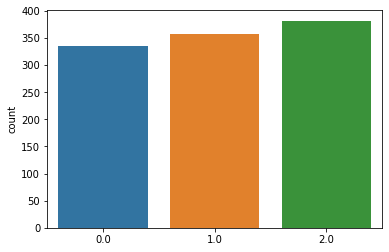

In [106]:
sns.countplot( x = cgiar_aug_label)
plt.show()

In [107]:
cgiar_aug_data = cgiar_aug_data / 255.0

#Converting class label to categorical
ytrain = to_categorical(cgiar_aug_label)
y_test = to_categorical(y_test)

In [109]:
cgiarmodel = cgiarModel() # Our custom CGIAR model
#Check point
model_name =  "../Trained Models/CGIAR/CGIARCustomModelwithAug_New.h5"
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
#Training the model
model_history = cgiarmodel.fit(cgiar_aug_data,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks=[check_point])

Epoch 1/20
17/17 [==============================] - ETA: 0s - loss: 1.0953 - accuracy: 0.3507
Epoch 1: val_accuracy improved from -inf to 0.49239, saving model to ../Trained Models/CGIAR\CGIARCustomModelwithAug_New.h5
17/17 [==============================] - 172s 10s/step - loss: 1.0953 - accuracy: 0.3507 - val_loss: 3.5378 - val_accuracy: 0.4924
Epoch 2/20
17/17 [==============================] - ETA: 0s - loss: 1.0651 - accuracy: 0.4586
Epoch 2: val_accuracy improved from 0.49239 to 0.52284, saving model to ../Trained Models/CGIAR\CGIARCustomModelwithAug_New.h5
17/17 [==============================] - 156s 9s/step - loss: 1.0651 - accuracy: 0.4586 - val_loss: 10.6753 - val_accuracy: 0.5228
Epoch 3/20
17/17 [==============================] - ETA: 0s - loss: 0.9778 - accuracy: 0.5302
Epoch 3: val_accuracy improved from 0.52284 to 0.54315, saving model to ../Trained Models/CGIAR\CGIARCustomModelwithAug_New.h5
17/17 [==============================] - 170s 10s/step - loss: 0.9778 - accura

In [110]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

- Training our custom  model with only original data

In [70]:
#splitting data into train and validation splits
xtrain,x_test,ytrain,y_test = train_test_split(cgiarimages,cgiarlabels,test_size = 0.25,random_state = 42,stratify = cgiarlabels)

#normalising train and test images
xtrain = xtrain/255.0
x_test = x_test/255.0

#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

In [71]:
cgiarmodel = cgiarModel()
#Check point
model_name = "../Trained Models/CGIAR/CGIARCustomModelwithoutAug.h5"
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
#Training the model
model_history = cgiarmodel.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks=[check_point])

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 1.0694 - accuracy: 0.4196
Epoch 1: val_accuracy improved from -inf to 0.42640, saving model to CGIARCustomModelwithoutAug.h5
10/10 [==============================] - 92s 9s/step - loss: 1.0694 - accuracy: 0.4196 - val_loss: 1.0358 - val_accuracy: 0.4264
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 1.0217 - accuracy: 0.4484
Epoch 2: val_accuracy improved from 0.42640 to 0.44162, saving model to CGIARCustomModelwithoutAug.h5
10/10 [==============================] - 90s 9s/step - loss: 1.0217 - accuracy: 0.4484 - val_loss: 1.0216 - val_accuracy: 0.4416
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 1.0136 - accuracy: 0.4467
Epoch 3: val_accuracy did not improve from 0.44162
10/10 [==============================] - 92s 9s/step - loss: 1.0136 - accuracy: 0.4467 - val_loss: 1.0080 - val_accuracy: 0.4061
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.9909 - ac

In [72]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

##### pretrained model for CGIAR

In [73]:
def cgiar_VGGmodel():
    
    #adapting vgg16 network for our network
    vgg_model = vgg16.VGG16(weights ="imagenet", input_shape = (224,224,3), include_top = False)
    #freezing vgg model
    vgg_model.trainable = False
    #Creating our custom model on top of vgg
    input_layer = Input(shape= (224,224,3))
    vgg_layer = vgg_model(input_layer, training = False)
    average_layer = Flatten()(vgg_layer)
    
    #Our dataset consists of 3class labels
    dense_layer1 = Dense(32,activation = "relu")(average_layer)
    dense_layer = Dense(3, activation = "softmax")(dense_layer1)
    cgiar_vgg = Model(input_layer, dense_layer) #define the model
    cgiar_vgg.compile(optimizer = adam_v2.Adam(0.0002),loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    return cgiar_vgg

###### Augmented CGIAR data

In [74]:
datagene = DataGenerator(zca = False, gaussian= False, poison= False)

batchsize = cgiarimages.shape[0]/ (2 * len(datagene.transformations))

datagenerated, ydatagen = datagene.transform(cgiarimages,cgiarlabels,batch_size = int(batchsize))  

cgiar_aug_data = np.append(cgiarimages,datagenerated,axis = 0) # merging both augmented data and original data
cgiar_aug_label =  np.append(cgiarlabels,ydatagen,axis = 0) # merging both aufmented labels and original labels

cgiar_aug_data = cgiar_aug_data / 255.0

xtrain,x_test,ytrain,y_test = train_test_split(cgiar_aug_data,cgiar_aug_label,test_size = 0.25,random_state = 42,stratify = cgiar_aug_label)

#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

C:\Users\bommi\AppData\Local\Temp\ipykernel_18632\3865977894.py:128: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(generateddataset_x, dtype = np.float),np.array(generateddataset_y,dtype = np.float)


In [75]:
cgiar_aug_model = cgiar_VGGmodel()

In [76]:
model_name = "../Trained Models/CGIAR/CGIARVggModelwithAug.h5"
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
model_history = cgiar_aug_model.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])

Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 1.0466 - accuracy: 0.4858 
Epoch 1: val_accuracy improved from -inf to 0.57143, saving model to CGIARVggModelwithAug.h5
14/14 [==============================] - 255s 18s/step - loss: 1.0466 - accuracy: 0.4858 - val_loss: 0.9119 - val_accuracy: 0.5714
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 0.8158 - accuracy: 0.6481 
Epoch 2: val_accuracy improved from 0.57143 to 0.67687, saving model to CGIARVggModelwithAug.h5
14/14 [==============================] - 230s 17s/step - loss: 0.8158 - accuracy: 0.6481 - val_loss: 0.7483 - val_accuracy: 0.6769
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.7469 
Epoch 3: val_accuracy improved from 0.67687 to 0.71088, saving model to CGIARVggModelwithAug.h5
14/14 [==============================] - 232s 17s/step - loss: 0.6867 - accuracy: 0.7469 - val_loss: 0.6687 - val_accuracy: 0.7109
Epoch 4/20
14/14 [===================

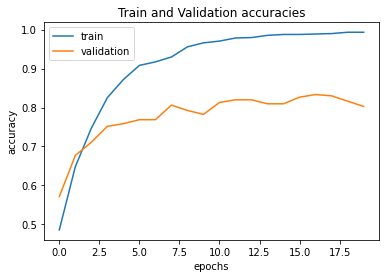

In [77]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

######  Unaugmented CGIAR data

In [79]:
xtrain,x_test,ytrain,y_test = train_test_split(cgiarimages,cgiarlabels,test_size = 0.25,random_state = 42,stratify = cgiarlabels)

#Normalizing training and test dataset
xtrain = xtrain/255.0
x_test = x_test/255.0

#Converting class label
ytrain = to_categorical(ytrain)
y_test = to_categorical(y_test)

In [80]:
cgiar_aug_model = cgiar_VGGmodel()

In [81]:
model_name = "../Trained Models/CGIAR/CGIARVggModelwithoutAug.h5"
#creating model check point for storing best model
check_point = ModelCheckpoint(model_name, monitor="val_accuracy", mode = "max", verbose = 1, save_best_only = True)
# Training our model
model_history = cgiar_aug_model.fit(xtrain,ytrain,batch_size = 64,epochs = 20,validation_data = (x_test,y_test), callbacks = [check_point])

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 0.9960 - accuracy: 0.4924 
Epoch 1: val_accuracy improved from -inf to 0.53807, saving model to CGIARVggModelwithoutAug.h5
10/10 [==============================] - 181s 18s/step - loss: 0.9960 - accuracy: 0.4924 - val_loss: 0.8959 - val_accuracy: 0.5381
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.7506 - accuracy: 0.6836 
Epoch 2: val_accuracy improved from 0.53807 to 0.61421, saving model to CGIARVggModelwithoutAug.h5
10/10 [==============================] - 190s 19s/step - loss: 0.7506 - accuracy: 0.6836 - val_loss: 0.8077 - val_accuracy: 0.6142
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.5978 - accuracy: 0.7665 
Epoch 3: val_accuracy improved from 0.61421 to 0.66497, saving model to CGIARVggModelwithoutAug.h5
10/10 [==============================] - 188s 19s/step - loss: 0.5978 - accuracy: 0.7665 - val_loss: 0.7066 - val_accuracy: 0.6650
Epoch 4/20
10/10 [==========

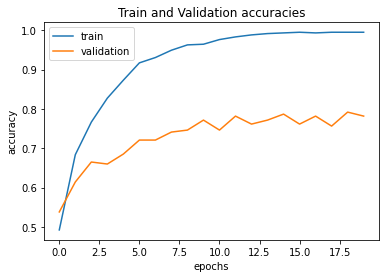

In [82]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel("epochs") #labelling x-axis
plt.ylabel("accuracy") # labelling y-axis
plt.title("Train and Validation accuracies") # Denotes title of the chart
plt.legend(["train","validation"])
plt.show()

##### Test Prediction

In [19]:
# custom model without augmented data
model = keras.models.load_model("../Trained Models/CGIAR/CGIARCustomModelwithoutAug.h5")
predict_y = model.predict(cgiartestx)

predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(cgiartesty, predict_y)
print("Test score: % f" %(accuracy_score(cgiartesty,predict_y)))


conmatrix = pandas.crosstab(cgiartesty, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.579545


Test score:  0.636364


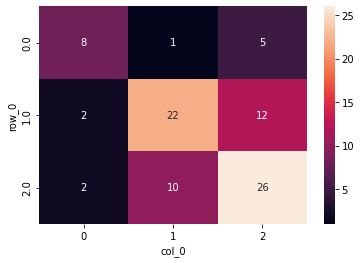

In [111]:
# custom with augmented data
model = keras.models.load_model("../Trained Models/CGIAR/CGIARCustomModelwithAug_New.h5")
predict_y = model.predict(cgiartestx)

predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(cgiartesty, predict_y)
print("Test score: % f" %(accuracy_score(cgiartesty,predict_y)))


conmatrix = pandas.crosstab(cgiartesty, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.477273


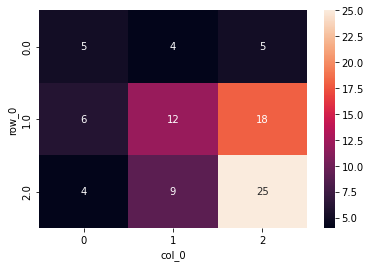

In [22]:
# VGG without augmented data
model = keras.models.load_model("../Trained Models/CGIAR/CGIARVggModelwithoutAug.h5")
predict_y = model.predict(cgiartestx)

predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(cgiartesty, predict_y)
print("Test score: % f" %(accuracy_score(cgiartesty,predict_y)))


conmatrix = pandas.crosstab(cgiartesty, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()

Test score:  0.568182


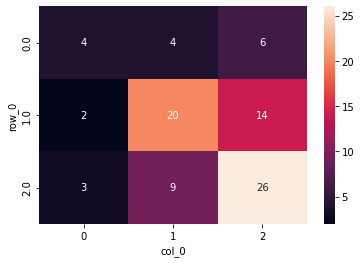

In [23]:
# VGG with augmented data
model = keras.models.load_model("../Trained Models/CGIAR/CGIARVggModelwithAug.h5")
predict_y = model.predict(cgiartestx)

predict_y = np.argmax(predict_y, axis = 1)

con_matrix = confusion_matrix(cgiartesty, predict_y)
print("Test score: % f" %(accuracy_score(cgiartesty,predict_y)))


conmatrix = pandas.crosstab(cgiartesty, predict_y)
sns.heatmap(conmatrix, annot = True)
plt.show()